In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [3]:
# Read in data sets
path_conflict = Path("Resources/conflict_data.csv")
conflict_df = pd.read_csv(path_conflict)

path_migration = Path("Resources/net_migration.csv")
migration_df = pd.read_csv(path_migration)

path_population = Path("Resources/population(1).csv")
population_df = pd.read_csv(path_population)

In [4]:
# Clean up Population Table to just country, year, and pop
selected_columns = population_df[["Country name", "Year", "Population"]]
population_only_df = pd.DataFrame(selected_columns)
population_only_df.head()

,Country name,Year,Population
0,Afghanistan,1950,7480464
1,Afghanistan,1951,7571542
2,Afghanistan,1952,7667534
3,Afghanistan,1953,7764549
4,Afghanistan,1954,7864289


In [5]:
# Create a new column with total deaths.
conflict_df["total_conflict_deaths"] = conflict_df[["One-sided violence", "Non-state", "Intrastate", "Interstate"]].sum(axis=1)
conflict_df

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0,0


In [6]:
# Remove all conflicts except total.
conflict_df.drop(["One-sided violence", "Non-state", "Intrastate", "Interstate"], axis=1, inplace=True)
conflict_df

,Entity,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0
...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0
6966,Zimbabwe,ZWE,2019,0
6967,Zimbabwe,ZWE,2020,0
6968,Zimbabwe,ZWE,2021,0


In [7]:
# Rename 'Entity' column in conflict_df to 'country name'
conflict_df.rename(columns={'Entity': 'Country name'}, inplace=True)
conflict_df.head()

,Country name,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0


In [8]:
# Merge conflict_df and migration_df on 'country_name' and 'year'
merged_df = pd.merge(conflict_df, migration_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration
0,Abkhazia,OWID_ABK,1989,0.0,NaN
1,Abkhazia,OWID_ABK,1990,0.0,NaN
2,Abkhazia,OWID_ABK,1991,0.0,NaN
3,Abkhazia,OWID_ABK,1992,0.0,NaN
4,Abkhazia,OWID_ABK,1993,0.0,NaN


In [9]:
# Merge the resulting DataFrame with population_df on 'country_name' and 'year'
merged_df = pd.merge(merged_df, population_only_df, on=['Country name', 'Year'], how='outer')
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
0,Abkhazia,OWID_ABK,1989,0.0,NaN,NaN
1,Abkhazia,OWID_ABK,1990,0.0,NaN,NaN
2,Abkhazia,OWID_ABK,1991,0.0,NaN,NaN
3,Abkhazia,OWID_ABK,1992,0.0,NaN,NaN
4,Abkhazia,OWID_ABK,1993,0.0,NaN,NaN


In [10]:
merged_df.dropna(how="any", inplace=True)
merged_df.head()

,Country name,Code,Year,total_conflict_deaths,Net migration,Population
73,Afghanistan,AFG,1989,5411.0,2683.0,10673172.0
74,Afghanistan,AFG,1990,1514.0,-666001.0,10694804.0
75,Afghanistan,AFG,1991,3553.0,39926.0,10745168.0
76,Afghanistan,AFG,1992,4366.0,1834556.0,12057436.0
77,Afghanistan,AFG,1993,4097.0,1171818.0,14003764.0


In [11]:
# Remove Code column
merged_df.drop(["Code"], axis=1, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
73,Afghanistan,1989,5411.0,2683.0,10673172.0
74,Afghanistan,1990,1514.0,-666001.0,10694804.0
75,Afghanistan,1991,3553.0,39926.0,10745168.0
76,Afghanistan,1992,4366.0,1834556.0,12057436.0
77,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [12]:
# Reset Index
merged_df.reset_index(drop=True, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Afghanistan,1989,5411.0,2683.0,10673172.0
1,Afghanistan,1990,1514.0,-666001.0,10694804.0
2,Afghanistan,1991,3553.0,39926.0,10745168.0
3,Afghanistan,1992,4366.0,1834556.0,12057436.0
4,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [13]:
# Remove all countries except for one
country_name = "Rwanda"
one_country_df = merged_df[merged_df['Country name'] == country_name]
one_country_df

,Country name,Year,total_conflict_deaths,Net migration,Population
4818,Rwanda,1989,0.0,-46816.0,7141981.0
4819,Rwanda,1990,2647.0,-31720.0,7319970.0
4820,Rwanda,1991,1085.0,-48085.0,7485683.0
4821,Rwanda,1992,647.0,3454.0,7657202.0
4822,Rwanda,1993,977.0,126168.0,7904741.0
4823,Rwanda,1994,772353.0,-2162873.0,6732668.0
4824,Rwanda,1995,4202.0,443316.0,5686897.0
4825,Rwanda,1996,1041.0,1372202.0,6715510.0
4826,Rwanda,1997,7288.0,239690.0,7666742.0
4827,Rwanda,1998,1913.0,-84051.0,7914653.0


In [14]:
# Drop Country Name and rename df
one_country_df.drop(["Country name"], axis=1, inplace=True)
rwanda_df = one_country_df
rwanda_df

C:\Users\tdp15\AppData\Local\Temp\ipykernel_2892\2833539226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_country_df.drop(["Country name"], axis=1, inplace=True)


,Year,total_conflict_deaths,Net migration,Population
4818,1989,0.0,-46816.0,7141981.0
4819,1990,2647.0,-31720.0,7319970.0
4820,1991,1085.0,-48085.0,7485683.0
4821,1992,647.0,3454.0,7657202.0
4822,1993,977.0,126168.0,7904741.0
4823,1994,772353.0,-2162873.0,6732668.0
4824,1995,4202.0,443316.0,5686897.0
4825,1996,1041.0,1372202.0,6715510.0
4826,1997,7288.0,239690.0,7666742.0
4827,1998,1913.0,-84051.0,7914653.0


In [15]:
rwanda_df.reset_index(drop=True, inplace=True)
rwanda_df

,Year,total_conflict_deaths,Net migration,Population
0,1989,0.0,-46816.0,7141981.0
1,1990,2647.0,-31720.0,7319970.0
2,1991,1085.0,-48085.0,7485683.0
3,1992,647.0,3454.0,7657202.0
4,1993,977.0,126168.0,7904741.0
5,1994,772353.0,-2162873.0,6732668.0
6,1995,4202.0,443316.0,5686897.0
7,1996,1041.0,1372202.0,6715510.0
8,1997,7288.0,239690.0,7666742.0
9,1998,1913.0,-84051.0,7914653.0


In [16]:
def millions(x, pos):
    return f"{x*1e-6:1.0f}M"

In [17]:
def thousand(x, pos):
    return f"{x*1e-3:1.0f}K"

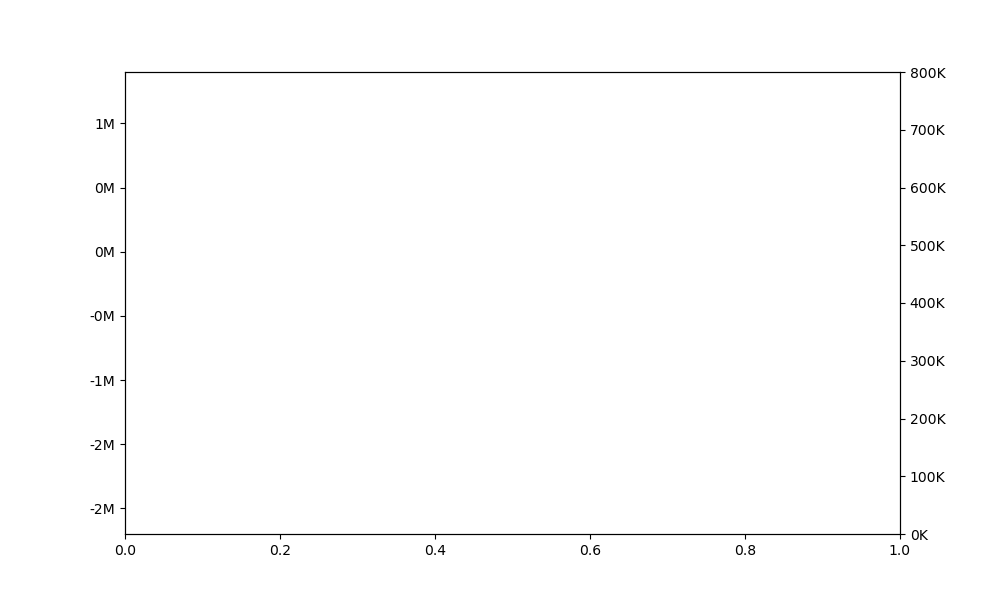

In [18]:
# Create graph for lines to go on
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  
#ax1.set_ylim(-2, 1)
ax2.set_ylim(0, 800000)
ax1.set_ylim(-2200000, 1400000)

ax1.yaxis.set_major_formatter(millions)
ax2.yaxis.set_major_formatter(thousand)

In [19]:
# Plot Conflicts
ax2.plot(rwanda_df.Year, rwanda_df.total_conflict_deaths, label="Conflict Deaths", color="red")

In [20]:
# Plot Migration
ax1.plot(rwanda_df.Year, rwanda_df["Net migration"], label="Net migration", color="green")

In [21]:
# Clean up Graph
ax1.set_xlabel("Year")
ax1.set_ylabel('People')
plt.ylabel('People')
plt.title("Rwanda: Conflict's Effect on Migration")
ax2.grid(True)
#ax1.grid(True)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

In [22]:
rwanda_df.corr()

,Year,total_conflict_deaths,Net migration,Population
Year,1.000000,-0.209276,0.044680,0.959482
total_conflict_deaths,-0.209276,1.000000,-0.827695,-0.237084
Net migration,0.044680,-0.827695,1.000000,0.014363
Population,0.959482,-0.237084,0.014363,1.000000


In [23]:
rwanda_df.corr()

,Year,total_conflict_deaths,Net migration,Population
Year,1.000000,-0.209276,0.044680,0.959482
total_conflict_deaths,-0.209276,1.000000,-0.827695,-0.237084
Net migration,0.044680,-0.827695,1.000000,0.014363
Population,0.959482,-0.237084,0.014363,1.000000


In [24]:
# Add new column calculating the percent of the population change over time.
rwanda_df["pop_pct_change"] =  rwanda_df.Population.pct_change()

# Clean up the headers for a clean display.
rwanda_df.columns = ["Year", "Conflict Deaths", "Net Migration", "Population", "Population % Change"]

# Identify which columns to display for correlation analysis.
coluns_to_display = ["Conflict Deaths", "Net Migration", "Population", "Population % Change"]

# Perform the correlation function on the df.
rwanda_df[coluns_to_display].corr()

C:\Users\tdp15\AppData\Local\Temp\ipykernel_2892\1699535599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rwanda_df["pop_pct_change"] =  rwanda_df.Population.pct_change()


,Conflict Deaths,Net Migration,Population,Population % Change
Conflict Deaths,1.000000,-0.827695,-0.237084,-0.543006
Net Migration,-0.827695,1.000000,0.014363,0.647737
Population,-0.237084,0.014363,1.000000,0.149155
Population % Change,-0.543006,0.647737,0.149155,1.000000
